                            company                             audit          size        date
0                     Ronin Network                         Unaudited  $624,000,000  03/23/2022
1                      Poly Network                         Unaudited  $611,000,000  08/10/2021
2                        BNB Bridge                         Unaudited  $586,000,000  10/06/2022
3                          Wormhole                           Neodyme  $326,000,000  02/02/2022
4                           BitMart                               NaN  $196,000,000  12/04/2021
5                      Nomad Bridge                               NaN  $190,000,000  08/01/2022
6                         Beanstalk                         Unaudited  $181,000,000  04/17/2022
7                        Wintermute                               NaN  $162,300,000  09/20/2022
8                          Compound                         Unaudited  $147,000,000  09/29/2021
9                     Vulcan Forged     

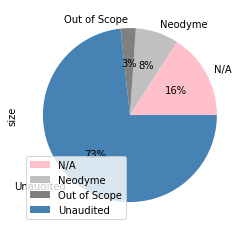

In [216]:
# https://rekt.news/ (leaderboard)
# tool: beautifulSoup for scraping and pandas for data processing
# database: mysql (easy to deal with data on the table)

import mysql.connector
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from pprint import pprint
import pandas as pd
import os.path
import csv
import mysql.connector as msql
from mysql.connector import Error


try:
    conn = msql.connect(host='localhost', user='root',  
                        password='__')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE")
        print("Database is created")
except Error as e:
    print("Error", e)


url = 'https://rekt.news/leaderboard/'


data = requests.get(url)
soup = BeautifulSoup(data.text, 'html.parser')

# create directory path
homedir = os.path.expanduser("~")
download_path = f'{homedir}/Desktop/Certik'
if not os.path.exists(download_path):
    os.makedirs(downlaod_path)
file = os.path.join(download_path, "rektlist.html") 

post_data = []
data_list = []

# download html
with open(file, 'w') as f:
    f.write(data.text)
    
# save data in a list  

rows = soup.select('.leaderboard-row')


for r in rows:
    title = r.select('.leaderboard-row-title')[0]
    company = title('a')[0].get_text()
    company = company.split(" - ")[0]
    audit = title.select('.leaderboard-audit')[0].get_text()
    details = r.select('.leaderboard-row-details')[0].get_text()
    details = details.split(" | ")
    size = details[0]
    date = details[1]
    post_data.append({"company": company, "audit": audit, "size": int(size[1:].replace(",", "")), "date": date})
    data_list.append([company, audit, size, date])


# created a csv file and write on it
createCSV(data_list)

# read from csv file
new_df = pd.read_csv("rekted_list.csv")

# print csv file
print(new_df.to_string()) 

## for data manipulation (plotting, sorting, etc)

# get colums
company_lst = getCol(post_data, "company")
audit_lst = getCol(post_data, "audit")
size_lst = getCol(post_data, "size")

# create key list
key_list = []
createKeys(key_list, "company")
createKeys(key_list, "audit")
createKeys(key_list, "size")

# create a table
table_rekted = createTable(post_data, key_list)

# draw a plot 
createChart(post_data, "audit", "size")
    

In [210]:
# create a csv file and write data on it

def createCSV(data):
    
    fields = ["company", "audit", "size", "date"]
    
    # open the file in the write mode
    filename = "rekted_list.csv"
    with open(filename, 'w') as csvfile:
        # create the csv writer
        csvwriter = csv.writer(csvfile) 
        csvwriter.writerow(fields) 
        # writing the data rows 
        csvwriter.writerows(data)
            


In [211]:
def getCol(data, key):
    
    col = []
    for i in data:
        col.append(i[key])
    return col  


In [212]:
def createKeys(lst, key):
    lst.append(key)

In [213]:
def createTable(data, keys):
    table = {}
    for i in keys:
        table[i] = getCol(data, i)
    rekt = pd.DataFrame(table)
    return rekt
    


           audit       size
0      Unaudited  624000000
1      Unaudited  611000000
2      Unaudited  586000000
3        Neodyme  326000000
4            N/A  196000000
5            N/A  190000000
6      Unaudited  181000000
7            N/A  162300000
8      Unaudited  147000000
9      Unaudited  140000000
10     Unaudited  130000000
11     Unaudited  120000000
12  Out of Scope  115000000
13           N/A  100000000
14     Unaudited   92000000
16     Unaudited   80000000
15     Unaudited   80000000
17     Unaudited   77700000
18     Unaudited   59000000
19     Unaudited   57200000


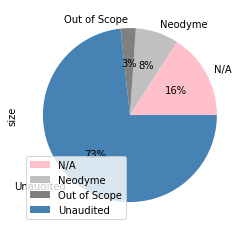

In [214]:
# make a chart (size by audit status)
def createChart(data, key1, key2):
    
    
    
    sample_data={ key1 : getCol(data, key1), key2: getCol(data, key2) }
    df = pd.DataFrame(sample_data)
    
    # show top 20 rows by size
    df = df.sort_values(by=[key2], ascending=False).head(20)
    print(df)
    
    # Defining colors for the pie chart
    colors = ['pink', 'silver', 'gray', 'steelblue']
  
    # Plotting the pie chart for above dataframe
    df.groupby([key1]).sum().plot(kind='pie', y= key2, autopct='%1.0f%%', colors=colors)

createChart(post_data, "audit", "size")